In [1]:
!pip install kaggle
#install kaggle library to make it easier to move the data to it vis kaggle api

#upload the credentials of the kaggle account
from google.colab import files
files.upload()

#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#import the dataset we want to use for our project
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

!ls
# they downloaded by default in the default path.content/sign-language-mnist
#kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

Saving kaggle.json to kaggle.json
  0% 0.00/1.59M [00:00<?, ?B/s]
100% 1.59M/1.59M [00:00<00:00, 52.3MB/s]
kaggle.json  news-headlines-dataset-for-sarcasm-detection.zip  sample_data


In [0]:
#extract the main folder form it's main directory to "tmp" folder based in ..
import os
import zipfile
#content/news-headlines-dataset-for-sarcasm-detection.zip
local_zip = '/content/news-headlines-dataset-for-sarcasm-detection.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp'
#tmp/sign_mnist_test.csv

## import json to read the file into json format,which by default divided into 3 sections ,[ sentence , label , urls]

### read the dataset into 3 coulmns article_link , headline ,is_sarcastic

In [4]:
import pandas as pd
df = pd.read_json("/tmp/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [0]:
#import json
#with open ('/tmp/Sarcasm_Headlines_Dataset.json','r')as f:
#  datastore = json.load(f)

In [0]:
sentences = []
urls      = []
labels    = []
for index, row in df.iterrows():
  urls.append(row[0])
  sentences.append(row[1])
  labels.append(row[2])


### make the usual preprocessing for text using tenorflow.tokens to separate each line into tokens , pad_sequence to fill each record with zeros

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenizer = Tokenizer (oov_token = "<oov>")
#tokenizer.fit_on_texts(sentences)
#word_index = tokenizer.word_index

In [0]:
#sequences = tokenizer.texts_to_sequences(sentences)
#padded = pad_sequences(sequences , padding = "post")
#print (sentences[2]) # print the senctence num 2 , fero index
#print (padded[2])
# padded will add the tokens of the setence followed by the zeros to fill the indexs 
#print (padded.shape)
#shape (26709, 40) the number of the sentences found in the dataset , 
#the maximum number of words of maxlength character

mom starting to fear son's web series closest thing she will have to grandchild
[  145   838     2   907  1749  2093   582  4719   221   143    39    46
     2 10736     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


remove stop words from all ove the sentences , using nltk

In [0]:
vocab_size    = 10000 # the max size to be in t]each sentence . 
embidding_dim = 16 
max_length    = 120  # max length of the padding sequences.
trunc_type    = "post" # if the sentence larger than 120 word , then will be cut from the end 
oov_tok       = "<OOV>" 
padding_type  = 'post'
traing_size   = 20000 
# make all Out of Vocabulary  with certain token .for words that aren't in the word index,
# and should be unique that isn't confused with other word
# the dataset has 27,000 record  . train on 20.000 and validate on the rest.

we wan tot split the data into training and testing sets , traing to 20.000 as specified in the traing_size   = 20000 . 

In [0]:
training_sentences = sentences[0:traing_size]
testing_sentences  = sentences[traing_size:]
training_labels    = labels[0:traing_size]
testing_labels     = labels[traing_size:]

we will sequence these sentences and padding them .

In [0]:
# num_words =vocab_size the total words should keep in the tokenizer.
tokenizer = Tokenizer (num_words =vocab_size , oov_token = "<oov>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length , truncating=trunc_type, padding = padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length , truncating=trunc_type, padding = padding_type)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size , embidding_dim , input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0702 09:24:30.859592 140338377131904 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0702 09:24:30.865378 140338377131904 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

W0702 09:24:36.886444 140338377131904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [25]:
nums_epochs = 30
# training is to passing the padding.
history =model.fit(training_padded ,training_labels ,epochs=nums_epochs ,validation_data=(testing_padded ,testing_labels),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.0620 - acc: 0.9806 - val_loss: 0.6103 - val_acc: 0.8337
Epoch 2/30
20000/20000 - 3s - loss: 0.0572 - acc: 0.9823 - val_loss: 0.6315 - val_acc: 0.8317
Epoch 3/30
20000/20000 - 3s - loss: 0.0538 - acc: 0.9845 - val_loss: 0.6574 - val_acc: 0.8314
Epoch 4/30
20000/20000 - 3s - loss: 0.0515 - acc: 0.9851 - val_loss: 0.6878 - val_acc: 0.8268
Epoch 5/30
20000/20000 - 3s - loss: 0.0478 - acc: 0.9855 - val_loss: 0.7071 - val_acc: 0.8278
Epoch 6/30
20000/20000 - 3s - loss: 0.0435 - acc: 0.9869 - val_loss: 0.7316 - val_acc: 0.8268
Epoch 7/30
20000/20000 - 3s - loss: 0.0427 - acc: 0.9872 - val_loss: 0.7575 - val_acc: 0.8235
Epoch 8/30
20000/20000 - 3s - loss: 0.0398 - acc: 0.9887 - val_loss: 0.7832 - val_acc: 0.8243
Epoch 9/30
20000/20000 - 3s - loss: 0.0369 - acc: 0.9898 - val_loss: 0.8117 - val_acc: 0.8186
Epoch 10/30
20000/20000 - 3s - loss: 0.0365 - acc: 0.9894 - val_loss: 0.8441 - val_acc: 0.8149
Epoch 11/3

we will plot the train accuracy and the validation accuracy , and the same on the loss 

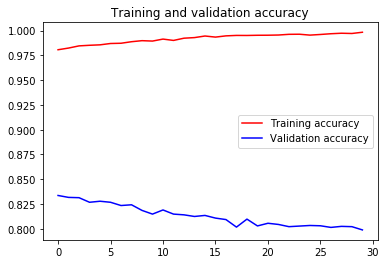

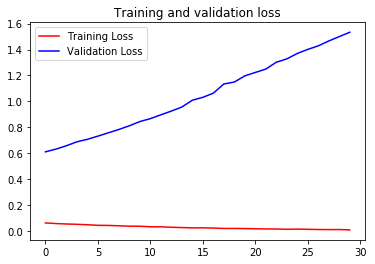

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

as we see above the more epochs we train the data the more accuracy we get on training data but the testing accuracy not great , 

and the validation loss increase , what a problem 

we will tweak the hyper paratmters , decrease the phrase size and take shorter sentences . reduce the likelihood of padding .and the number of dimensions of embeddings 

In [0]:
#vocab_size    = 1000 # the max size to be in t]each sentence . 
#embidding_dim = 32 
#max_length    = 16  # max length of the padding sequences.
#trunc_type    = "post" # if the sentence larger than 120 word , then will be cut from the end 
#oov_tok       = "<OOV>" 
#padding_type  = 'post'
#traing_size   = 20000 

In [0]:
## we should make the stepabove many times and see the impact of the result ,
## and try to make compinations to make the accuracy high and the loss decrease 